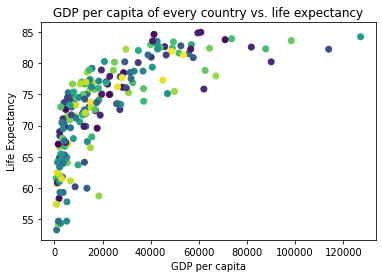

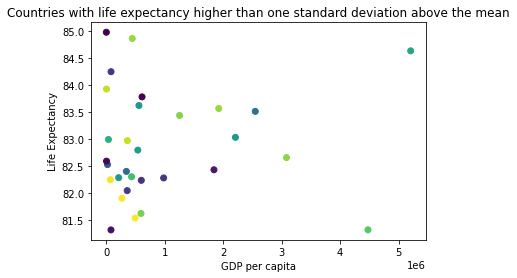

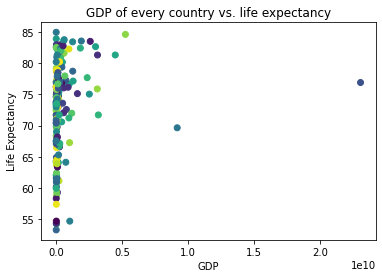

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
from sklearn import datasets 

gdpworldbank = pd.read_csv(r"C:\Users\Tjend\OneDrive\Documents\Python\DAT405\lab1\DAT405\gdp.csv", index_col = False)
lifeExpectancy = pd.read_csv(r"C:\Users\Tjend\OneDrive\Documents\Python\DAT405\lab1\DAT405\life-expectancy.csv", index_col = False)
population = pd.read_csv(r"C:\Users\Tjend\OneDrive\Documents\Python\DAT405\lab1\DAT405\WPP2019_TotalPopulationBySex.csv", index_col = False)

GDPRelevantYear = gdpworldbank[gdpworldbank["Year"] == 2019]
lifeRelevantYear = lifeExpectancy[lifeExpectancy["Year"] == 2019]
populationRelevantYear = population[population["Time"] == 2019]
GDPRelevantYear.reset_index(drop=True, inplace=True)
lifeRelevantYear.reset_index(drop=True, inplace=True)
populationRelevantYear.reset_index(drop=True, inplace=True)

GDPRelevantYear.reset_index(drop=True, inplace=True)
lifeRelevantYear.reset_index(drop=True, inplace=True)
populationRelevantYear.reset_index(drop=True, inplace=True)

def relateData(lifeExpectancy, GDPData):
    xData = []
    yData = []
    countryData = []

    EntityDataLife = lifeExpectancy.Entity
    EntityDataGDP = GDPData.Entity
    for i in range(len(lifeExpectancy)):
        for j in range(len(GDPData)):
            if EntityDataGDP[j] == EntityDataLife[i]:
                xData.append(lifeExpectancy.LifeExpectancy[i])
                yData.append(GDPData.GDPPC[j])
                countryData.append(EntityDataLife[i])
    return(xData, yData, countryData)


testData = relateData(lifeRelevantYear, GDPRelevantYear)
yData = testData[0]
xData = testData[1]
countryData = testData[2]

N = len(yData)
colors = np.random.rand(N)
plt.scatter(xData, yData, c=colors)
plt.xlabel("GDP per capita")
plt.ylabel("Life Expectancy")
plt.title("GDP per capita of every country vs. life expectancy")
plt.show()

sortedY = yData.copy()
sortedY.sort()
sortedCountry = []
sortedXData = []
j = 0
i = -1

while j < len(yData):
    i += 1
    if sortedY[j] == yData[i]:
        sortedCountry.append(countryData[i])
        sortedXData.append(xData[i])
        j += 1
        i = -1

boundOfPoverty = int(np.ceil(len(sortedY)*0.84))
countriesAboveBoundry = sortedCountry[boundOfPoverty:len(sortedCountry)]
bestCountries = np.array(sortedXData[boundOfPoverty:len(sortedCountry)])
populationSizes = np.array([2.088, 83.43, 8.88, 11.49, 5.522, 10.29, 20.19, 0.62, 17.34, 4.979, 4.934, 5.348, 37.59, 0.514, 0.064, 67.25, 10.28, 9.054, 0.67, 51.71, 25.37, 59.73, 47.13, 5.686, 8.637, 0.066, 0.6493, 125.8, 7.482, 0.034])

GDP = np.multiply(bestCountries,populationSizes)
highLifeExpectancy = sortedY[boundOfPoverty:len(sortedCountry)]
N2 = len(GDP)
colors2 = np.random.rand(N2)
plt.scatter(GDP, highLifeExpectancy, c=colors2)
plt.xlabel("GDP per capita")
plt.ylabel("Life Expectancy")
plt.title("Countries with life expectancy higher than one standard deviation above the mean")
plt.show()

def FindGDP(GDPData,countries,populationData, lifeExpectancyData):
    population = []
    GDPPC = []
    lifeExpectancy = []
    theCountry = []

    Entities = countries
    EntityPopulation = populationData.Location
    for i in range(len(countries)):
        for j in range(len(populationData)):
            if Entities[i] == EntityPopulation[j]:
                population.append(populationData.PopTotal[j])
                GDPPC.append(GDPData[i])
                lifeExpectancy.append(lifeExpectancyData[i])
                theCountry.append(Entities[i])
    GDP = np.multiply(population, GDPPC)
    return(GDP, lifeExpectancy, theCountry)

GDPAndExpectancyByCountry = FindGDP(xData, countryData, populationRelevantYear, yData)
GDPByCountry = GDPAndExpectancyByCountry[0]
GDPByCountryMinusWorld = np.delete(GDPByCountry, 170)
lifeExpectancyByCountry = GDPAndExpectancyByCountry[1]
lifeExpectancyByCountry.pop(170)
theCountry = GDPAndExpectancyByCountry[2]

N3 = len(GDPByCountryMinusWorld)
colors3 = np.random.rand(N3)
plt.scatter(GDPByCountryMinusWorld, lifeExpectancyByCountry, c=colors3)
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
plt.title("GDP of every country vs. life expectancy")
plt.show()


Problem 1
a) We decide to scatter plot data which has some correlation to one another, that is, if year and location is the same we scatter plot the given life expectancy vs. gdp data. The data clearing we did for this part was that we decided to only look at the year 2019 (which was the last common year, hence most relevant). The reason for only looking at a certain year is because of the dynamic economic growth of countries, so in order to present a good visualization a 3D graph is needed.

b) We can notice that generally higher GDP per capita results in a longer expected life time, which is expected. Furthermore we can see that living in different countries affects the expected life time, which is the explanation of the logarithmic curveture (big difference in the lower region of GDP per capita). Furthermore after a certain GDP/capita we can see that the expected life time does not increase alot. This is because the majority of the population in that country can afford medical help and other tools to increase the expected life span, e.g. showers for improved hygiene. Therefore the results seems reasonable.

d) We know from the normal distribution that the lower 84% of the distribution is the set which contains the countries which is not above one standard deviation of the distribution, hence we can sort the countries according to life expectancy and conclude that the upper most 16% of countries is above one standard deviation. The countries which have this high life expectancy is the following:

Slovenia, Germany, Austria, Belgium, Finland, Portugal, Greece, Luxembourg, Netherlands, New Zealand, Ireland, Norway, Canada, Malta, Bermuda, France, Sweden, Israel, Iceland, South Korea, Australia, Italy, Spain, Singapore, Switzerland, Cayman Islands, Macao, Japan, Hong Kong, San Marino.

e) When considering the top 16% as high life expectancy we saw that the following countries had a low GDP: SLV, FIN, LUX, NZL, MLT, BRM, ISL, MAC, CYM.

f) Not every strong economy has a high life expectancy as shown in the graph. The majoirty of strong economys has a lower life expectancy than 81.5, which we earlier defined as the limit for high life expectancy.

g) As shown in Figure 1, we can clearly notice that the majority of countries with high GDP per capita has a high life expectancy (above 81.5 years) with only Qatar having high GDP per capita but low life expectancy. If we compare with the last graph, where we plot gdp vs life expectancy, there is a clear difference. As answered in f) not every strong economy has a high life expectancy. This is because GDP is dependent on how many people lives in a country. This makes it so that the people might be poor, but the country might still have a strong economy. Generally areas of extreme poverty does not have a good health care which results in relatively low life expectancy which in turn decreases the countries life expectancy. Furthermore, the number of poor people out weight the number of rich people, hence these poor areas contribute more to the national life expectancy than the areas of rich people. 

